In [1]:
import pandas as pd

# Učitaj CSV
df = pd.read_csv("../data/products.csv")

# Očisti nazive kolona
df.columns = df.columns.str.strip()

# Prvih 5 redova
df.head()


,product ID,Product Title,Merchant ID,Category Label,_Product Code,Number_of_Views,Merchant Rating,Listing Date
0,1,apple iphone 8 plus 64gb silver,1,Mobile Phones,QA-2276-XC,860.0,2.5,5/10/2024
1,2,apple iphone 8 plus 64 gb spacegrau,2,Mobile Phones,KA-2501-QO,3772.0,4.8,12/31/2024
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,Mobile Phones,FP-8086-IE,3092.0,3.9,11/10/2024
3,4,apple iphone 8 plus 64gb space grey,4,Mobile Phones,YI-0086-US,466.0,3.4,5/2/2022
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,Mobile Phones,NZ-3586-WP,4426.0,1.6,4/12/2023


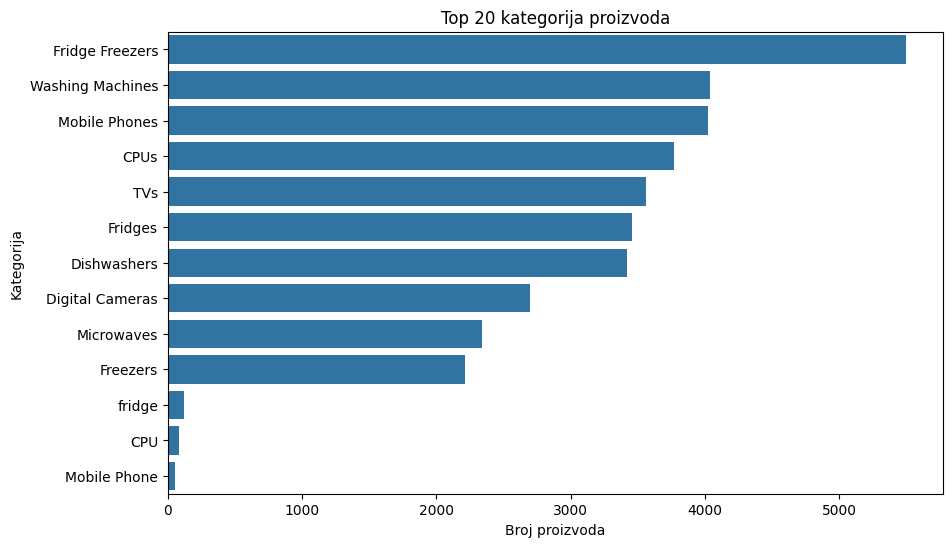

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 20 kategorija
top_categories = df['Category Label'].value_counts().head(20)

plt.figure(figsize=(10,6))
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title("Top 20 kategorija proizvoda")
plt.xlabel("Broj proizvoda")
plt.ylabel("Kategorija")
plt.show()


In [3]:
import re

def preprocess_title(title: str) -> str:
    t = str(title).lower()
    t = re.sub(r'[^a-z0-9 ]', ' ', t)
    t = re.sub(r'\s+', ' ', t).strip()
    return t

df["clean_title"] = df["Product Title"].apply(preprocess_title)
df.head()


,product ID,Product Title,Merchant ID,Category Label,_Product Code,Number_of_Views,Merchant Rating,Listing Date,clean_title
0,1,apple iphone 8 plus 64gb silver,1,Mobile Phones,QA-2276-XC,860.0,2.5,5/10/2024,apple iphone 8 plus 64gb silver
1,2,apple iphone 8 plus 64 gb spacegrau,2,Mobile Phones,KA-2501-QO,3772.0,4.8,12/31/2024,apple iphone 8 plus 64 gb spacegrau
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,Mobile Phones,FP-8086-IE,3092.0,3.9,11/10/2024,apple mq8n2b a iphone 8 plus 64gb 5 5 12mp sim...
3,4,apple iphone 8 plus 64gb space grey,4,Mobile Phones,YI-0086-US,466.0,3.4,5/2/2022,apple iphone 8 plus 64gb space grey
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,Mobile Phones,NZ-3586-WP,4426.0,1.6,4/12/2023,apple iphone 8 plus gold 5 5 64gb 4g unlocked ...


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# 🔹 Čišćenje podataka
df = df.dropna(subset=["clean_title", "Category Label"])

# 🔹 Podela skupa
X_train, X_test, y_train, y_test = train_test_split(
    df["clean_title"], df["Category Label"], test_size=0.2, random_state=42, stratify=df["Category Label"]
)

# 🔹 Pipeline
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1,2), max_features=50000)),
    ("clf", LogisticRegression(max_iter=1000))
])

# 🔹 Treniranje
pipeline.fit(X_train, y_train)

# 🔹 Evaluacija
y_pred = pipeline.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(classification_report(y_test, y_pred))


Accuracy: 0.947
                  precision    recall  f1-score   support

             CPU       0.00      0.00      0.00        17
            CPUs       0.98      0.99      0.98       754
 Digital Cameras       0.99      0.99      0.99       539
     Dishwashers       0.93      0.95      0.94       684
        Freezers       0.98      0.89      0.93       442
 Fridge Freezers       0.92      0.94      0.93      1099
         Fridges       0.85      0.90      0.88       691
      Microwaves       1.00      0.96      0.98       468
    Mobile Phone       0.00      0.00      0.00        11
   Mobile Phones       0.96      0.99      0.98       804
             TVs       0.97      0.98      0.97       713
Washing Machines       0.95      0.95      0.95       807
          fridge       0.00      0.00      0.00        25

        accuracy                           0.95      7054
       macro avg       0.73      0.73      0.73      7054
    weighted avg       0.94      0.95      0.94      7

C:\Users\Rale\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Rale\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Rale\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classif

In [6]:
import joblib
from pathlib import Path

MODEL_DIR = Path("../models")
MODEL_DIR.mkdir(parents=True, exist_ok=True)
MODEL_PATH = MODEL_DIR / "product_model.pkl"

joblib.dump(pipeline, MODEL_PATH)
print(f"✅ Model sačuvan u {MODEL_PATH}")


✅ Model sačuvan u ..\models\product_model.pkl
